In [134]:
#imported packages
install.packages("ggplot2")
install.packages("dplyr")
install.packages("GGally")
library(ggplot2)
library(dplyr)
library(GGally)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpjGLZrX/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpjGLZrX/downloaded_packages


installiere auch Abh"angigkeiten 'forcats', 'patchwork', 'Rcpp', 'hms', 'prettyunits', 'tidyr', 'ggstats', 'plyr', 'progress'





Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpjGLZrX/downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [123]:
#input dataset
car_data <- read.csv("data/CarPrice.csv")
head(car_data)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [124]:
#check if there is any missing value
missing_value <- sum(is.na(car_data))
missing_value

[1] 0

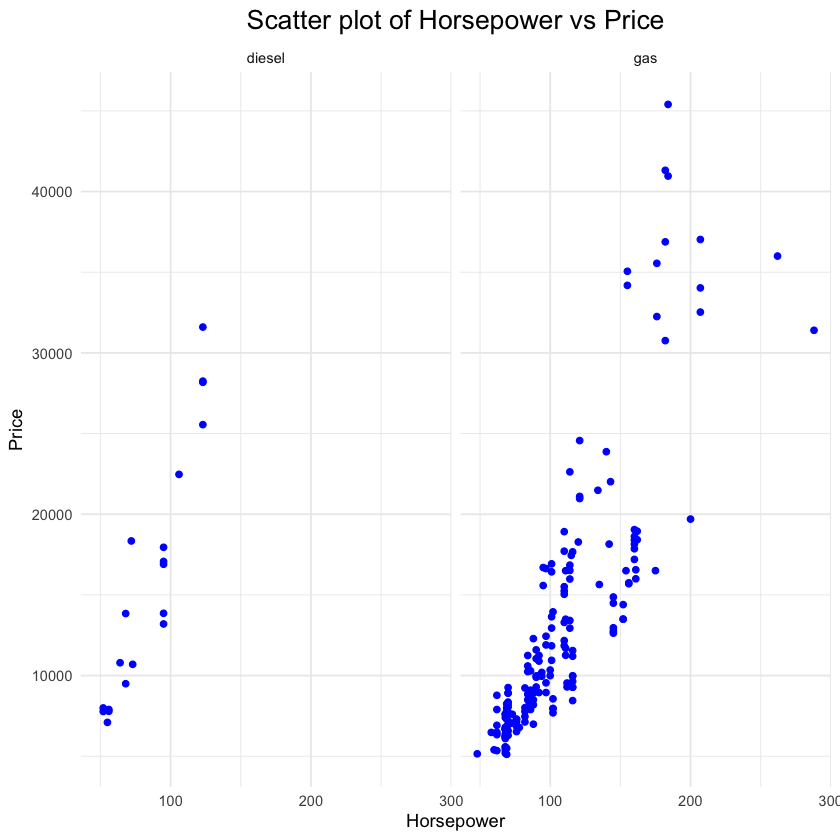

In [125]:
# scatterplot for price vs horsepower
ggplot(car_data, aes(x = horsepower, y = price, color = fueltype)) +
  geom_point(color = "blue") +
  facet_wrap(~ fueltype)+
  labs(title = "Scatter plot of Horsepower vs Price", x = "Horsepower", y = "Price") +
  theme_minimal()+
  theme(plot.title = element_text(size = 16, hjust = 0.5))

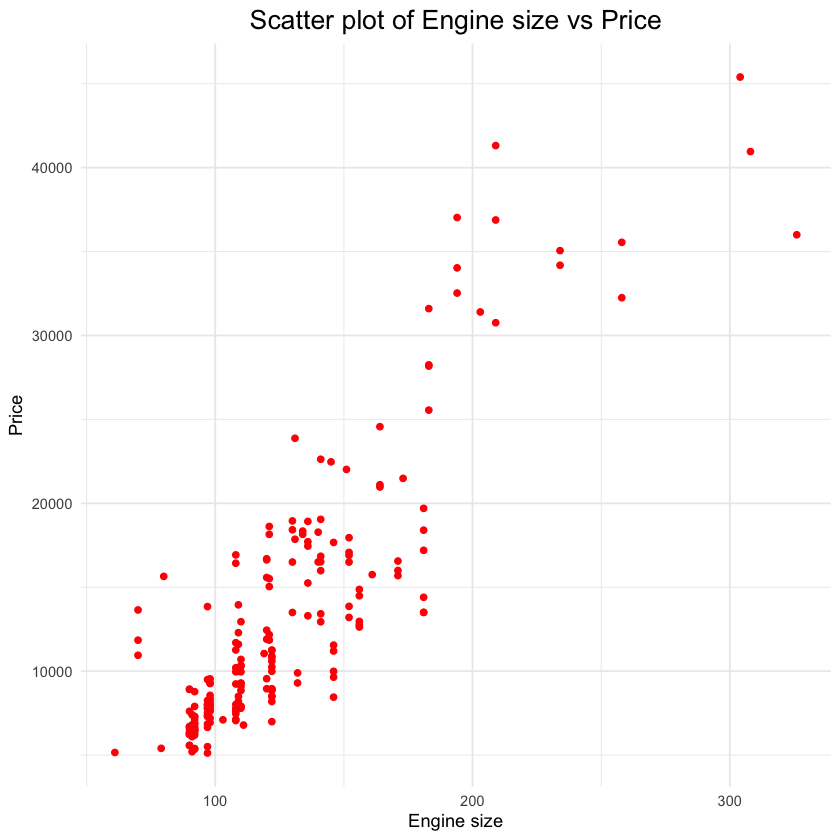

In [126]:
# scatterplot for price vs enginesize
ggplot(car_data, aes(x = enginesize, y = price)) +
  geom_point(color = "red")+
  labs(title = "Scatter plot of Engine size vs Price", x = "Engine size", y = "Price") +
  theme_minimal()+
  theme(plot.title = element_text(size = 16, hjust = 0.5))

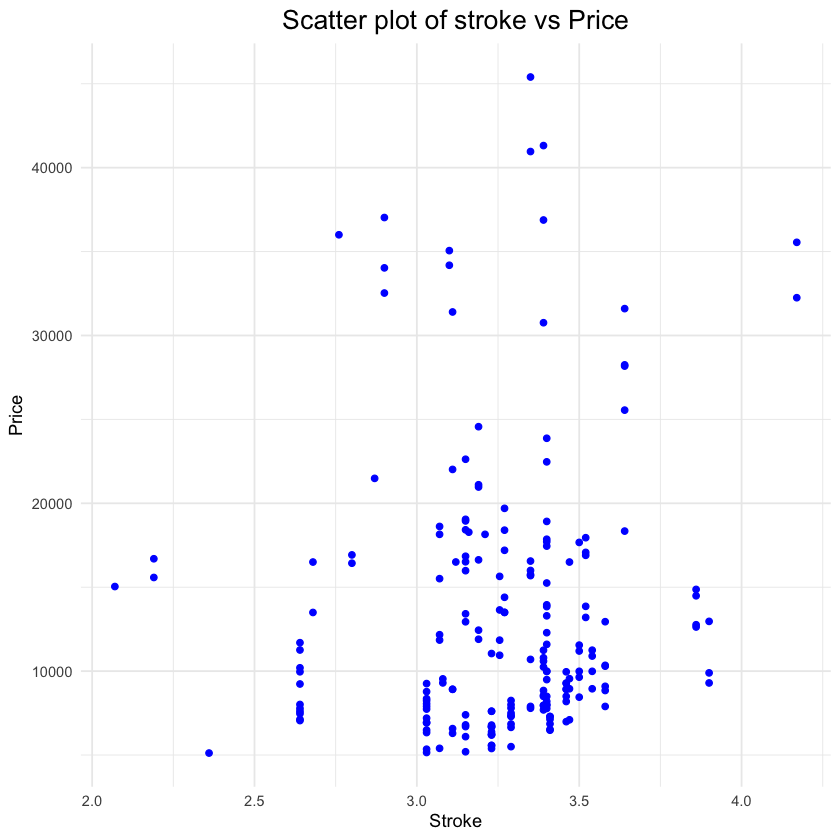

In [127]:
#scatterplot for price vs stroke
ggplot(car_data, aes(x = stroke, y = price)) +
  geom_point(color = "blue") +
  labs(title = "Scatter plot of stroke vs Price", x = "Stroke", y = "Price") +
  theme_minimal()+
  theme(plot.title = element_text(size = 16, hjust = 0.5))

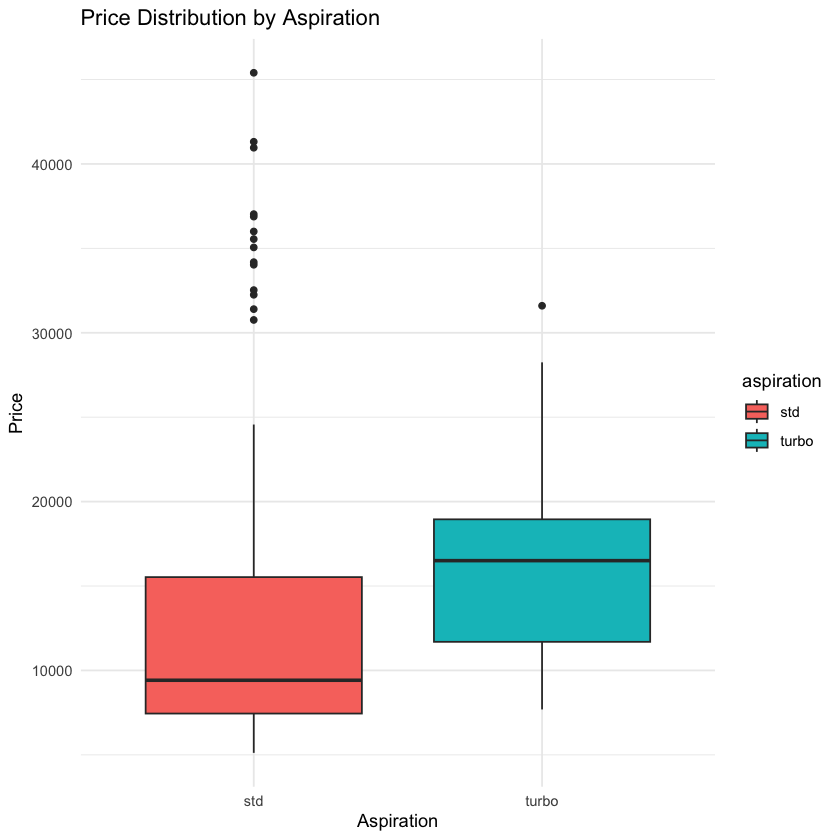

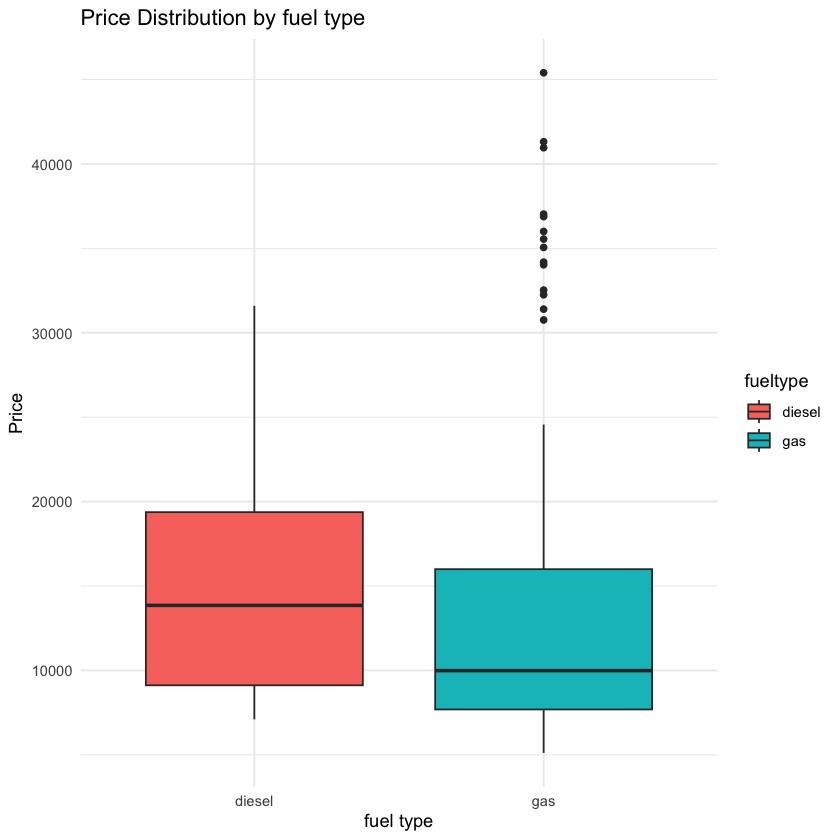

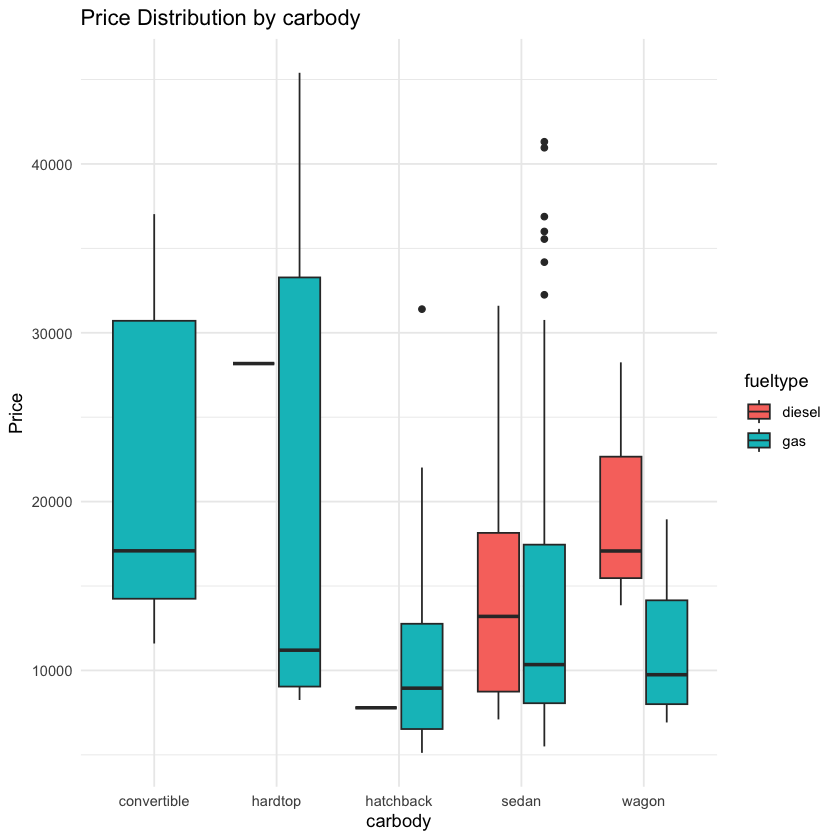

In [128]:
#box plot for aspiration
ggplot(car_data, aes(x = aspiration, y = price, fill = aspiration)) +
  geom_boxplot() +
  labs(title = "Price Distribution by Aspiration", x = "Aspiration", y = "Price") +
  theme_minimal()
#box plot for fuel type
ggplot(car_data, aes(x = fueltype, y = price, fill = fueltype)) +
  geom_boxplot() +
  labs(title = "Price Distribution by fuel type", x = "fuel type", y = "Price") +
  theme_minimal()

ggplot(car_data, aes(x = carbody, y = price, fill = fueltype)) +
geom_boxplot() +
labs(title = "Price Distribution by carbody", x = "carbody", y = "Price") +
theme_minimal()

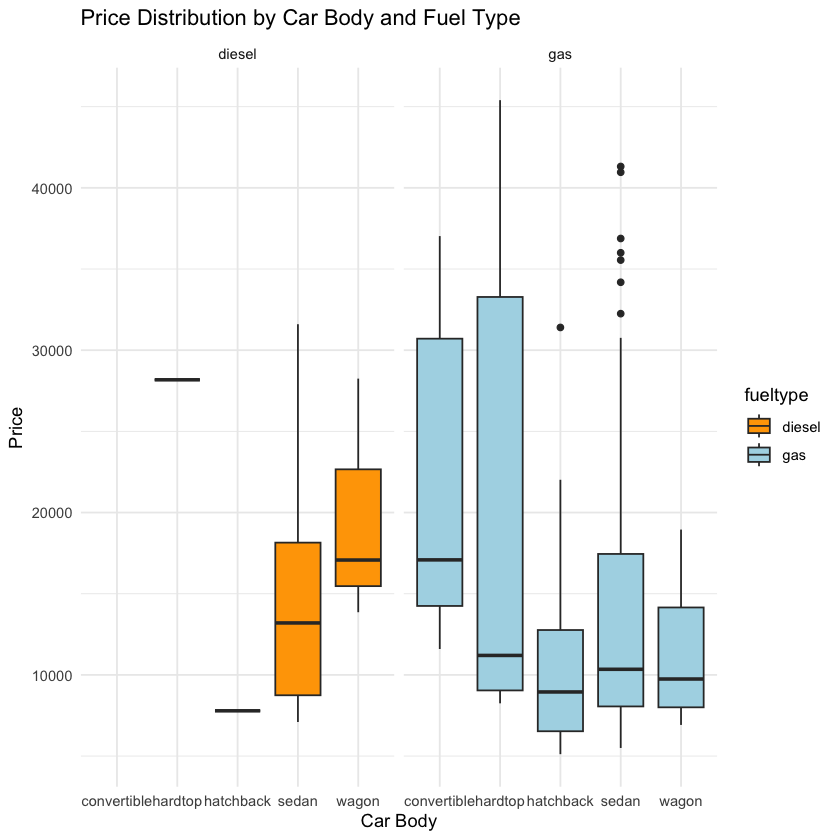

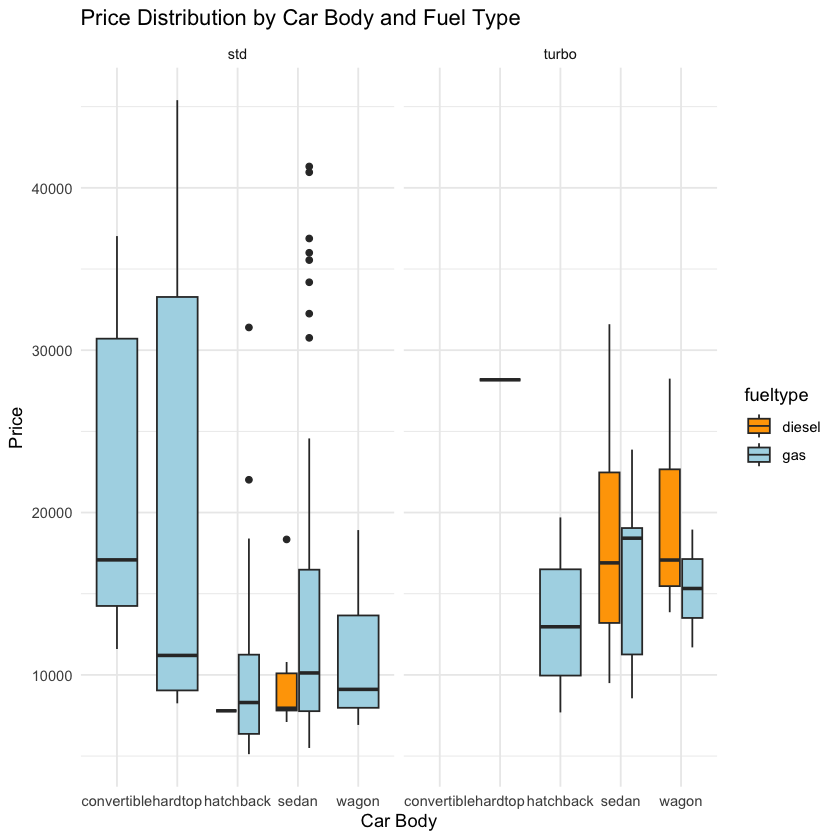

In [129]:
# boxplot for carbody under different fueltype
ggplot(car_data, aes(x = carbody, y = price, fill = fueltype)) + 
  geom_boxplot() +
  facet_wrap(~ fueltype) + 
  scale_fill_manual(values = c("gas" = "lightblue", "diesel" = "orange")) +  
  labs(title = "Price Distribution by Car Body and Fuel Type", x = "Car Body", y = "Price") +
  theme_minimal()

# boxplot for carbody under different aspiration
ggplot(car_data, aes(x = carbody, y = price, fill = fueltype)) + 
  geom_boxplot() +
  facet_wrap(~ aspiration) + 
  scale_fill_manual(values = c("gas" = "lightblue", "diesel" = "orange")) +  
  labs(title = "Price Distribution by Car Body and Fuel Type", x = "Car Body", y = "Price") +
  theme_minimal()


In [149]:
#encode the categorical features
non_numeric_data <- car_data %>% select_if(Negate(is.numeric))
 

car_data_new <- car_data
car_data_new$CarName <- as.numeric(factor(car_data$CarName))
car_data_new$fueltype <- as.numeric(factor(car_data$fueltype))
car_data_new$aspiration <- as.numeric(factor(car_data$aspiration))
car_data_new$doornumber <- as.numeric(factor(car_data$doornumber))
car_data_new$carbody <- as.numeric(factor(car_data$carbody))
car_data_new$drivewheel <- as.numeric(factor(car_data$drivewheel))
car_data_new$enginelocation <- as.numeric(factor(car_data$enginelocation))
car_data_new$enginetype <- as.numeric(factor(car_data$enginetype))
car_data_new$cylindernumber <- as.numeric(factor(car_data$cylindernumber))
car_data_new$fuelsystem <- as.numeric(factor(car_data$fuelsystem))

# build the correlation matrix
cor_matrix <- cor(car_data_new, use = "complete.obs")
cor_matrix


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.00000000,-0.151621137,0.96707688,-0.12556815,0.06772882,-0.19035153,0.098302988,0.05140650,0.05148336,0.12972878,...,-0.03392984,0.20489756,0.260063680,-0.160823619,0.150275906,-0.01500557,-0.203789200,0.01594004,0.011255318,-0.10909334
symboling,-0.15162114,1.000000000,-0.10709473,0.19431094,-0.05986605,0.66407345,-0.596135261,-0.04167148,0.21247094,-0.53195368,...,-0.10578971,0.09116306,-0.130051360,-0.008735141,-0.178515084,0.07087272,0.273606245,-0.03582263,0.034606001,-0.07997822
CarName,0.96707688,-0.107094731,1.00000000,-0.06943504,0.01991439,-0.17174549,0.099691128,-0.01612855,0.05596814,0.01454958,...,-0.15398225,0.12384470,0.188598243,-0.181775374,0.101730001,-0.09213132,-0.138308784,0.09343723,0.102895378,-0.23143912
fueltype,-0.12556815,0.194310939,-0.06943504,1.00000000,-0.40139723,0.19149054,-0.147852993,-0.13225748,0.04006951,-0.30834586,...,-0.06959429,0.04152912,-0.054451029,-0.241828821,-0.984356057,0.16392617,0.476882642,-0.25596256,-0.191391911,-0.10567948
aspiration,0.06772882,-0.059866047,0.01991439,-0.40139723,1.00000000,-0.03179175,0.063027871,0.06646465,-0.05719146,0.25761086,...,0.10821740,0.28808645,0.212614195,0.222982177,0.295540772,0.24168525,-0.183382835,-0.20236188,-0.254416470,0.17792622
doornumber,-0.19035153,0.664073452,-0.17174549,0.19149054,-0.03179175,1.00000000,-0.680357685,0.09895445,0.13775666,-0.44735674,...,-0.02074183,0.01551899,-0.119258224,0.011081644,-0.177888309,0.12694694,0.247668178,0.01241665,0.036329848,-0.03183527
carbody,0.09830299,-0.596135261,0.09969113,-0.14785299,0.06302787,-0.68035769,1.000000000,-0.15574477,-0.27700933,0.40136233,...,-0.07335200,-0.06507862,0.010549262,-0.015325043,0.136243385,-0.15392759,-0.109642831,0.03169700,-0.007170353,-0.08397568
drivewheel,0.05140650,-0.041671476,-0.01612855,-0.13225748,0.06646465,0.09895445,-0.155744773,1.00000000,0.14786454,0.45974535,...,0.52430719,0.42468577,0.481826695,0.071590649,0.127478985,0.51868648,-0.039416872,-0.44958067,-0.452219713,0.57799153
enginelocation,0.05148336,0.212470935,0.05596814,0.04006951,-0.05719146,0.13775666,-0.277009333,0.14786454,1.00000000,-0.18779024,...,0.19682630,0.10597130,0.185041942,-0.138455489,-0.019762005,0.31783935,0.198460847,-0.15348746,-0.102026213,0.32497330
wheelbase,0.12972878,-0.531953682,0.01454958,-0.30834586,0.25761086,-0.44735674,0.401362332,0.45974535,-0.18779024,1.00000000,...,0.56932868,0.38460065,0.488749875,0.160959047,0.249785845,0.35329448,-0.360468748,-0.47041361,-0.544081923,0.57781560
